In [1]:
#import required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
#Load the dataset
total=pd.read_csv("TestData.csv")
#Delete all the duplicates
total.drop_duplicates(keep='first',inplace=True)
total.head()

,type,sendTime,sender,messageID,posX,posY,posZ,attackerType
0,3,10800.392785,13,38,3597.152086,5542.199221,1.895,0
1,3,10800.456150,31,104,3596.805861,5692.113417,1.895,0
2,3,10800.582020,25,137,3597.770493,5764.800893,1.895,0
3,3,10800.670638,43,172,3822.892006,5266.806009,1.895,0
4,3,10800.870012,19,193,3617.100034,5417.782781,1.895,0


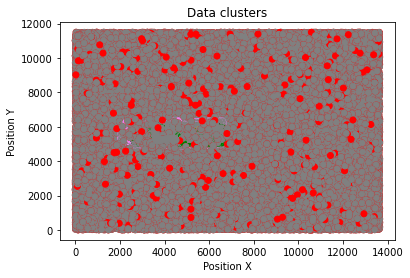

In [3]:
#define a dictionary to color each attack
colors={0:'grey',1:'orange',2:'green',4:'red',8:'violet',16:'black'}
f,ax=plt.subplots()
#Plot each data point
ax.scatter(total['posX'],total['posY'],c=total['attackerType'].map(colors),label=total['attackerType'])
plt.xlabel('Position X')
plt.ylabel('Position Y')
plt.title('Data clusters')
plt.show()

C:\Anaconda\envs\hello-tf\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


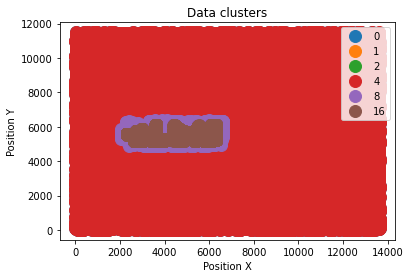

In [4]:
#plotting using another technique
#group the dataset based on attacker type
g=total.groupby('attackerType')
#plot each data point
for name,gr in g:
    plt.plot(gr.posX,gr.posY,marker='o',linestyle='',markersize=12,label=name)
plt.legend()
plt.xlabel('Position X')
plt.ylabel('Position Y')
plt.title('Data clusters')
plt.show()

In [5]:
#Extract the features ...posX and posY
x1=total.iloc[:,4:6]
x1.head()

,posX,posY
0,3597.152086,5542.199221
1,3596.805861,5692.113417
2,3597.770493,5764.800893
3,3822.892006,5266.806009
4,3617.100034,5417.782781


In [6]:
#Define a kmeans model with 6 clusters
kmeans1=KMeans(6)

In [7]:
#fit the model by passing the positions of the data 
kmeans1.fit(x1)

KMeans(n_clusters=6)

In [8]:
#Extract the identified clusters
identified_clusters1 = kmeans1.fit_predict(x1)
identified_clusters1

array([1, 1, 1, ..., 1, 1, 2])

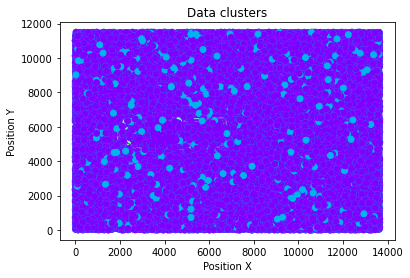

In [9]:
#copy the dataset
data_with_clusters1 = total.copy()
#add a new column 'clusters' to represent the cluster that each data point belongs to
data_with_clusters1['Clusters'] = identified_clusters1 
#plot the data points along with clusters
plt.scatter(data_with_clusters1['posX'],data_with_clusters1['posY'],c=data_with_clusters1['attackerType'],cmap='rainbow')
plt.xlabel('Position X')
plt.ylabel('Position Y')
plt.title('Data clusters')
plt.show()

In [16]:
#number of samples in each cluster
data_with_clusters1['Clusters'].value_counts()

2    759513
0    739574
3     30797
1     30763
5     23642
4     22393
Name: Clusters, dtype: int64

In [13]:
#display cluster centers
pd.DataFrame(kmeans1.cluster_centers_)

,0,1
0,3818.039297,5451.710253
1,10660.672378,2710.201170
2,5805.654804,5683.725360
3,10544.114096,8847.909410
4,3228.470219,1768.874218
5,3181.157296,9529.398088


In [14]:
total.describe()

,type,sendTime,sender,messageID,posX,posY,posZ,attackerType
count,1606682.0,1.606682e+06,1.606682e+06,1.606682e+06,1.606682e+06,1.606682e+06,1.606682e+06,1.606682e+06
mean,3.0,2.374648e+04,1.048147e+03,2.592246e+06,4.999991e+03,5.582700e+03,1.895000e+00,1.396042e+00
std,0.0,3.430674e+03,7.531313e+02,2.006877e+06,1.657275e+03,1.016648e+03,2.442491e-15,3.767875e+00
min,3.0,1.080002e+04,7.000000e+00,3.800000e+01,2.585713e-01,2.657739e-02,1.895000e+00,0.000000e+00
25%,3.0,2.520906e+04,3.730000e+02,5.318482e+05,3.698276e+03,5.303684e+03,1.895000e+00,0.000000e+00
50%,3.0,2.523930e+04,9.310000e+02,2.434315e+06,4.936846e+03,5.586401e+03,1.895000e+00,0.000000e+00
75%,3.0,2.526956e+04,1.621000e+03,4.371029e+06,6.037222e+03,5.818945e+03,1.895000e+00,0.000000e+00
max,3.0,2.530000e+04,3.115000e+03,6.540580e+06,1.363999e+04,1.149983e+04,1.895000e+00,1.600000e+01


In [15]:
data_with_clusters1.describe()

,type,sendTime,sender,messageID,posX,posY,posZ,attackerType,Clusters
count,1606682.0,1.606682e+06,1.606682e+06,1.606682e+06,1.606682e+06,1.606682e+06,1.606682e+06,1.606682e+06,1.606682e+06
mean,3.0,2.374648e+04,1.048147e+03,2.592246e+06,4.999991e+03,5.582700e+03,1.895000e+00,1.396042e+00,1.151418e+00
std,0.0,3.430674e+03,7.531313e+02,2.006877e+06,1.657275e+03,1.016648e+03,2.442491e-15,3.767875e+00,1.160884e+00
min,3.0,1.080002e+04,7.000000e+00,3.800000e+01,2.585713e-01,2.657739e-02,1.895000e+00,0.000000e+00,0.000000e+00
25%,3.0,2.520906e+04,3.730000e+02,5.318482e+05,3.698276e+03,5.303684e+03,1.895000e+00,0.000000e+00,0.000000e+00
50%,3.0,2.523930e+04,9.310000e+02,2.434315e+06,4.936846e+03,5.586401e+03,1.895000e+00,0.000000e+00,2.000000e+00
75%,3.0,2.526956e+04,1.621000e+03,4.371029e+06,6.037222e+03,5.818945e+03,1.895000e+00,0.000000e+00,2.000000e+00
max,3.0,2.530000e+04,3.115000e+03,6.540580e+06,1.363999e+04,1.149983e+04,1.895000e+00,1.600000e+01,5.000000e+00
